<div style="text-align: center; color: red;"><h2>NLP Project: Amazon Reviews Sentiment Analysis by GenMinds (Machine Learning notebook)</h2></div>

In the previous notebook, we went over exploring the Amazon Reviews 23 dataset, mainly the 'All Beauty' category. The original one had around 700K entries and was quite unbalanced that we had to undersample it. We also pre-processed it to be ready for use with the various model algorithms.

# Import modules

In [61]:
import os
from utils import *

import numpy as np
import pandas as pd

from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics import classification_report, confusion_matrix

import joblib

# Load the dataset extracted last time

In [2]:
df = pd.read_csv('GenMinds_Balanced_Dataset_All_Beauty.csv', index_col=0)

In [3]:
df.head()

,review_text,label
0,one star bad,0
1,three stars okay,1
2,missing bottle defective sprayer instead 4 bot...,0
3,disappointed little disappointed product case ...,1
4,don’t stay began peeling 20 minutes putting on,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168848 entries, 0 to 168920
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_text  168848 non-null  object
 1   label        168848 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ MB


# Tokenization

In [3]:
df['tokens'] = df['review_text'].apply(word_tokenize)

# TF-IDF approach

TF-IDF, which stands for $\textit{Term Frequency-Inverse Document Frequency}$, is a statistical approach that is used in NLP tasks to evaluate the importance of a word in a document relative to a corpus (a collection of documents). The formulas are as follows:

<figure style="width: 600px; height: 500px; display: block; margin: auto;">
    <img src="https://media.geeksforgeeks.org/wp-content/uploads/20250207113146020518/The-TF-Formula.webp">
    <img src="https://media.geeksforgeeks.org/wp-content/uploads/20250207113218469447/IDF-Formula.webp">
</figure>

- TF aims to determine the frequency of a term in a document which, alone, does not account for its global importance across the corpus.
Also, common stopwords like 'the' or 'and' may have high scores but are not meaningful.

- IDF highlights the importance of rare words by reducing the weight of common words. And through the logarithmic formula, the IDF scores scale appropriately. It is to note, however, that a term might be rare across the corpus but is irrelevant in a specific document.

You can read more about TF-IDF <a href="https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/">here</a>.

We'll approach training our models based on this method first. Then, we'll move on to something else.

In [4]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=7500)

# Fit and transform the data
X_tfidf = tfidf.fit_transform(df['review_text'])

In [5]:
# Convert the sparse matrix to a dense format and store it in a dataframe
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
y = df['label']

In [6]:
X_tfidf_df

,05,10,100,1000,10000,1010,1015,1050,1090,10a,...,zero,zinc,zip,ziploc,ziplock,zipper,zippered,zippers,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_df, y, test_size=0.2, random_state=42)

<h1>NOTE: If you already have the trained models saved, the notebook will automatically reload it for you. Otherwise, it will create it and train it.</h1>

## XGBoost

Our first model of choice is eXtreme Gradient Boosting, a machine learning algorithm based on gradient boosting, which combines the outcome of weak learners, typically decision trees, to create a strong predictive model. It improves upon standard gradient through performance optimization.

<figure style="width: 600px; height: 500px; display: block; margin: auto;">
    <img src="https://www.researchgate.net/publication/345327934/figure/fig3/AS:1022810793209856@1620868504478/Flow-chart-of-XGBoost.png">
</figure>

Some of its hyperparameters include:

+ `tree_method`: The algorithm used for constructing decision trees (`exact` for greedy construction, `approx`, `hist` and `gpu_hist`).
+ `n_estimators`: The number of trees to train.
+ `learning_rate`: The step size for each tree's contribution to the final prediction.
+ `max_depth`: The maximum depth of each tree.
+ `eval_metric`: The evaluation metric used for validation (`rmse` for regression, `logloss` and `mlogloss` for classification depending on the number of classes).
+ `random_state`: The seed for the random number generation, a fixed number ensures the same results can be reproduced every time.

In [ ]:
# Initialize the model or load from file if it exists
file = './models/xgb_tfidf_model.joblib'

if os.path.exists(file):
    xgb_tfidf_model = load_model(file)

else:
    print("Failed to fetch model file. Creating the model...")
    xgb_tfidf_model = xgb.XGBClassifier(
        tree_method="gpu_hist", # Use GPU acceleration
        max_depth=6,
        learning_rate=0.1,
        n_estimators=300,
        random_state=42,
        verbosity=2, # Controls general logs
        eval_metric="mlogloss" # Multi-class log loss
    )
    print("Model created! Training...")
    xgb_tfidf_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

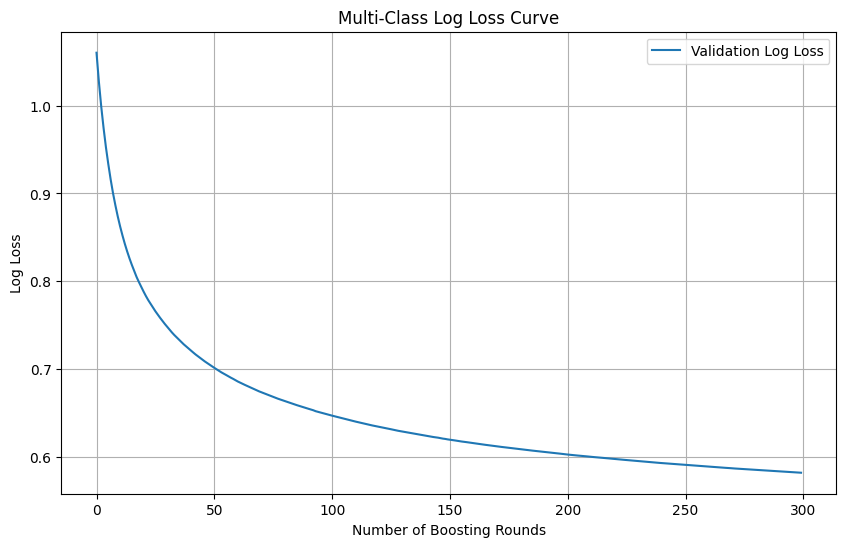

In [9]:
# Extract the evaluation results (mlogloss) from the training process
evals_result = xgb_tfidf_model.evals_result()

# Plot the multi-log loss curve
plt.figure(figsize=(10, 6))
plt.plot(evals_result['validation_0']['mlogloss'], label='Validation Log Loss')
plt.title('Multi-Class Log Loss Curve')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()

We notice a good curve where the log loss starts to cap at 0.57.

In [10]:
# Predict on the test set
xgb_tfidf_y_pred = xgb_tfidf_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, xgb_tfidf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_tfidf_y_pred))

c:\Users\Amine\Desktop\9raya\NLP\nlp_proj_venv\Lib\site-packages\xgboost\core.py:2676: UserWarning: [23:08:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
c:\Users\Amine\Desktop\9raya\NLP\nlp_proj_venv\Lib\site-packages\xgboost\core.py:729: UserWarning: [23:08:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

 

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76     11427
           1       0.69      0.66      0.68     11372
           2       0.85      0.82      0.83     10971

    accuracy                           0.76     33770
   macro avg       0.76      0.76      0.76     33770
weighted avg       0.76      0.76      0.76     33770

Confusion Matrix:
[[9040 1996  391]
 [2607 7552 1213]
 [ 662 1360 8949]]


The model, despite being trained on TF-IDF data, shows decent results across all classes with values of class 1 (Neutral) lower than its counterparts. The precision, recall and f1-score values show promising performance. But, will it hold up ? Let's find out!

In [11]:
def map_results(predictions):
    label_mapping = {0: "Negative", 1: "Neutral", 2: "Good"}
    predicted_sentiments = [label_mapping[label] for label in predictions]

    return predicted_sentiments

In [12]:
# Example input text
new_texts = ["excellent product! Highly recommend it", # Positive
             "very bad product, avoid at all costs!", # Negative
             "I don't know, it's not bad but it's not too good either."] # Neutral

# Transform the new text using the trained TF-IDF vectorizer
new_texts = [remove_punctuation(text).lower() for text in new_texts]
new_texts = [remove_stopwords(text) for text in new_texts]
X_new = tfidf.transform(new_texts)

Above are some test sentences that need to undergo the same data transformations as the training set (punctuation removal, deleting stopwords and lowercase in this context, there are no emojis though.) Will the current model be able to correctly classify it ?

In [13]:
# Predict class labels using the XGB model
xgb_predicted_labels = xgb_tfidf_model.predict(X_new)

predicted_sentiments = map_results(xgb_predicted_labels)

# Print predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Review: {text} -> Sentiment: {sentiment}")

Review: excellent product highly recommend -> Sentiment: Good
Review: bad product avoid costs -> Sentiment: Good
Review: dont know not bad but not good either -> Sentiment: Good


It seems our model couldn't properly classify these review texts.

In [ ]:
if not os.path.exists('./models/xgb_tfidf_model.joblib'):
    joblib.dump(xgb_tfidf_model, './models/xgb_tfidf_model.joblib')

## Random Forest

Random Forest is a derivative of Decision Tree, an ensemble learning algorithm that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. It trains each tree on a random subset of the data, also known as `bagging`. The final prediction is made by majority voting (classification) or averaging (regression), making it robust and less prone to overfitting than individual decision trees.

<figure style="width: 600px; height: 500px; display: block; margin: auto;">
    <img src="https://www.researchgate.net/publication/355828449/figure/fig3/AS:1085564153528357@1635830071846Schematic-diagram-of-the-random-forest-algorithm.png">
</figure>

We'll be simply setting the number of estimators `n_estimators` to 300 with a `max_depth` of 10. Note that, this time, we'll be training on the CPU since GPU support for Random Forest is only available through cuML, which doesn't support Windows yet.

In [ ]:
# Initialize the model or load from file if it exists
file = './models/rf_tfidf_model.joblib'

if os.path.exists(file):
    rf_tfidf_model = load_model('./models/rf_tfidf_model.joblib')

else:
    print("Failed to fetch model file. Creating the model...")
    rf_tfidf_model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
    print("Model created! Training...")
    rf_tfidf_model.fit(X_train, y_train)

In [15]:
rf_tfidf_y_pred = rf_tfidf_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, rf_tfidf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_tfidf_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     11427
           1       0.70      0.57      0.63     11372
           2       0.72      0.86      0.78     10971

    accuracy                           0.72     33770
   macro avg       0.72      0.72      0.72     33770
weighted avg       0.72      0.72      0.72     33770

Confusion Matrix:
[[8476 1653 1298]
 [2544 6492 2336]
 [ 438 1120 9413]]


In [16]:
rf_predicted_labels = rf_tfidf_model.predict(X_new)

predicted_sentiments = map_results(rf_predicted_labels)

# Print predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Review: {text} -> Sentiment: {sentiment}")

Review: excellent product highly recommend -> Sentiment: Good
Review: bad product avoid costs -> Sentiment: Negative
Review: dont know not bad but not good either -> Sentiment: Neutral


c:\Users\Amine\Desktop\9raya\NLP\nlp_proj_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
if not os.path.exists('./models/rf_tfidf_model.joblib'):
    joblib.dump(rf_tfidf_model, './models/rf_tfidf_model.joblib')

## Logistic Regression

In [ ]:
# Initialize the model or load from file if it exists
file = './models/xgb_tfidf_model.joblib'

if os.path.exists(file):
    lr_tfidf_model = load_model('./models/lr_tfidf_model.joblib')

else:
    print("Failed to fetch model file. Creating the model...")
    lr_tfidf_model = LogisticRegression(multi_class='multinomial', random_state=42) # 'multinomial' is better than 'ovr (one versus rest)' since the dataset is large and balanced
    print("Model created! Training...")
    lr_tfidf_model.fit(X_train, y_train)

In [18]:
lr_tfidf_y_pred = lr_tfidf_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, lr_tfidf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_tfidf_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     11427
           1       0.70      0.69      0.70     11372
           2       0.86      0.86      0.86     10971

    accuracy                           0.78     33770
   macro avg       0.78      0.78      0.78     33770
weighted avg       0.78      0.78      0.78     33770

Confusion Matrix:
[[8973 2110  344]
 [2275 7841 1256]
 [ 334 1199 9438]]


In [19]:
lr_predicted_labels = lr_tfidf_model.predict(X_new)

predicted_sentiments = map_results(lr_predicted_labels)

# Print predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Review: {text} -> Sentiment: {sentiment}")

Review: excellent product highly recommend -> Sentiment: Good
Review: bad product avoid costs -> Sentiment: Negative
Review: dont know not bad but not good either -> Sentiment: Negative


c:\Users\Amine\Desktop\9raya\NLP\nlp_proj_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
if not os.path.exists('./models/lr_tfidf_model.joblib'):
    joblib.dump(lr_tfidf_model, './models/lr_tfidf_model.joblib')

## Naive Bayes (Multinomial)

In [ ]:
file = './models/nb_tfidf_model.joblib'

if os.path.exists(file):
    nb_tfidf_model = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    nb_tfidf_model = MultinomialNB()
    print("Model created! Training...")
    nb_tfidf_model.fit(X_train, y_train)

In [21]:
nb_tfidf_y_pred = nb_tfidf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, nb_tfidf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_tfidf_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     11427
           1       0.70      0.56      0.62     11372
           2       0.70      0.86      0.77     10971

    accuracy                           0.71     33770
   macro avg       0.71      0.71      0.71     33770
weighted avg       0.71      0.71      0.71     33770

Confusion Matrix:
[[8255 1662 1510]
 [2484 6338 2550]
 [ 470 1106 9395]]


In [22]:
nb_predicted_labels = nb_tfidf_model.predict(X_new)

predicted_sentiments = map_results(nb_predicted_labels)

# Print predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Review: {text} -> Sentiment: {sentiment}")

Review: excellent product highly recommend -> Sentiment: Good
Review: bad product avoid costs -> Sentiment: Good
Review: dont know not bad but not good either -> Sentiment: Neutral


c:\Users\Amine\Desktop\9raya\NLP\nlp_proj_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
if not os.path.exists('./models/nb_tfidf_model.joblib'):
    joblib.dump(rf_tfidf_model, './models/nb_tfidf_model.joblib')

## K-Means

In [ ]:
file = './models/kmeans_tfidf_model.joblib'

if os.path.exists(file):
    kmeans_tfidf_model = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    kmeans_tfidf_model = KMeans(n_clusters=3, random_state=10, n_init=10)
    print("Model created! Training...")
    kmeans_tfidf_model.fit(X_train)

In [24]:
kmeans_labels = kmeans_tfidf_model.labels_

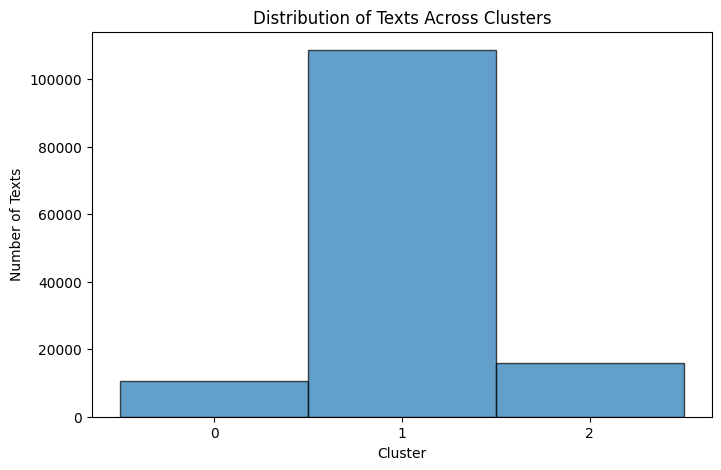

In [25]:
num_clusters = 3

# Plot cluster distribution
plt.figure(figsize=(8, 5))
plt.hist(kmeans_labels, bins=np.arange(num_clusters + 1) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(num_clusters))
plt.xlabel("Cluster")
plt.ylabel("Number of Texts")
plt.title("Distribution of Texts Across Clusters")
plt.show()

The model doesn't perform well with TF-IDF. Maybe it can be better with Word2Vec.

In [ ]:
if not os.path.exists('./models/kmeans_tfidf_model.joblib'):
    joblib.dump(kmeans_tfidf_model, './models/kmeans_tfidf_model.joblib')

['./models/kmeans_tfidf_model.joblib']

## Truncated SVD (Singular Value Decomposition)

In [ ]:
file = './models/svd_tfidf_model.joblib'

if os.path.exists(file):
    X_reduced = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    svd_tfidf_model = TruncatedSVD(n_components=2)
    print("Model created! Training...")
    X_reduced = svd_tfidf_model.fit_transform(X_train)

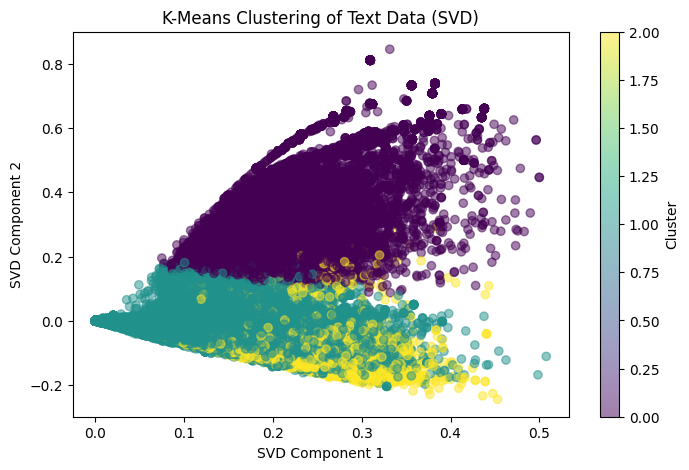

In [30]:
# Scatter plot of clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("K-Means Clustering of Text Data (SVD)")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
if not os.path.exists('./models/svd_tfidf_model.joblib'):
    joblib.dump(X_reduced, './models/svd_tfidf_model.joblib')

['./models/svd_tfidf_model.joblib']

# Word2Vec approach

### Generate embeddings

In [31]:
sentences = df['tokens'].tolist()

In [32]:
sentences

[['one', 'star', 'bad'],
 ['three', 'stars', 'okay'],
 ['missing',
  'bottle',
  'defective',
  'sprayer',
  'instead',
  '4',
  'bottles',
  'received',
  '3',
  'one',
  'sprayers',
  'defective'],
 ['disappointed',
  'little',
  'disappointed',
  'product',
  'case',
  'broken',
  'case',
  'line',
  'adhesive',
  'strip',
  'partial',
  'lifted',
  'magnets',
  '2',
  'eyelashes',
  'difficult',
  'remove',
  'lashes',
  'adhesive',
  'lashes',
  'flimsy',
  'picture',
  'used',
  'definitely',
  'not',
  'accurate',
  'not',
  'expecting',
  '15',
  'mins',
  'finally',
  'able',
  'apply',
  'them',
  'look',
  'bad',
  'applied',
  'them'],
 ['don',
  '’',
  't',
  'stay',
  'began',
  'peeling',
  '20',
  'minutes',
  'putting',
  'on'],
 ['do',
  'not',
  'buy',
  'this',
  'almost',
  'empty',
  'bottles',
  'took',
  'top',
  '5',
  'bottles',
  'poured',
  'one',
  'even',
  'get',
  'full',
  'bottle',
  'way',
  'could',
  'bought',
  'full',
  'bottle',
  'half',
  'pric

## Create the Word2Vec model or load if it's saved

In [ ]:
file = './models/word2vec.model'

if os.path.exists(file):
    word2vec_model = load_model(file)

else:
    print("Failed to fetch model file. Creating...")
    word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=16,min_count=1, workers=4, epochs=10)
    print("Model created!")
    if not os.path.exists(file):
        word2vec_model.save(file)
        print("Model saved!")

In [34]:
word_vector = word2vec_model.wv["great"] # Get vector for the word "great"
print(word_vector)

[-1.3638482  -3.0990782   0.9058887   1.387734   -0.9586647  -1.5450629
 -1.5349272  -0.10324144  1.6417786  -1.8406616   1.645935    2.5549033
 -1.4038532  -0.845482   -1.6175296   0.3098475   0.35571507  2.4683917
  0.68418235  1.0479997  -0.24099758 -0.47712678 -1.6781847   1.0733849
  3.0199678  -0.9796755  -1.480551    0.72818834  1.6171952   0.5115614
  2.3297875   2.7850258  -0.72032857  3.0164065   0.87408584 -1.2810904
 -0.15373112 -0.06561374  0.2057374   1.41069     1.5663363   1.8093778
 -0.7706048   0.87798375 -2.1721923   3.319968    1.3553375  -1.1211559
 -2.202855   -2.5543857   1.0440694  -0.62956816  1.8184737   0.29046878
 -2.3414805  -0.7886499  -2.090765    1.7233273   1.6056272   1.1984261
 -1.3815765  -2.8136451   3.2128778  -0.5686327  -0.51666623 -0.22660023
  0.8773884   0.6726543  -0.6260462  -0.06642428  0.36541972 -0.09377273
 -2.2744794   0.43554428  0.38361117  0.1440682  -0.7828249  -2.968183
 -3.1424668   0.01295327  3.0873492  -2.1914618  -0.1393812   

### Small similarity test

In [35]:
test_words = ["great", "worst", "average",]

for word in test_words:
    similar_words = word2vec_model.wv.most_similar(word, topn=5)
    print(f"Similar word of '{word}': {similar_words}")

Similar word of 'great': [('good', 0.7259478569030762), ('awesome', 0.6184465885162354), ('amazing', 0.5890615582466125), ('nice', 0.5704588890075684), ('fantastic', 0.5672759413719177)]
Similar word of 'worst': [('loudest', 0.6316258907318115), ('ugliest', 0.6065316796302795), ('thinnest', 0.5998057126998901), ('worse', 0.5890233516693115), ('absolute', 0.5824419856071472)]
Similar word of 'average': [('terms', 0.5895516872406006), ('adultsized', 0.556084156036377), ('adequate', 0.5211485028266907), ('higher', 0.5140167474746704), ('circumference', 0.4974731504917145)]


## Vectorization

In [36]:
# Function to get sentence vector by averaging word vectors
def get_sentence_vector(sentence, model):
    # The sentence is a list of tokens (words)
    words = sentence
    
    # Collect word vectors for each word in the sentence
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    
    # If no words found in model, return a vector of zeros
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    
    # Return the mean of the word vectors
    return np.mean(word_vectors, axis=0)

In [37]:
# Example: Get the sentence vector for a preprocessed sentence
sentence = ['love', 'this', 'product']  # Example tokenized sentence
sentence_vector = get_sentence_vector(sentence, word2vec_model)
print(sentence_vector)

[ 1.2064556  -1.1855226  -1.1007253  -1.5504805  -1.0129061   1.7482456
 -1.0401374  -0.68938977  0.16894102 -0.5641903  -1.4067596  -1.0776314
 -1.3226084  -1.2233778  -0.44569373 -2.4545906  -0.33199972  0.58235574
  0.7342307   2.0192077   0.33972815  1.6782428  -0.27497017  0.24515991
 -1.3406686  -0.5848929  -0.80354375  0.25566533 -0.72558993  1.0666829
  0.7851717  -0.35060963  0.04501317  2.61225     1.18106    -1.9639497
  0.7917843   0.85043365 -0.6624097   0.941799    1.6771225   0.70209795
 -0.60809916  0.6311903  -2.2286065  -1.7204119  -0.47180152  0.5299996
 -0.53114694 -0.37423754  0.56513304  0.4183036   0.42908815 -1.5624293
 -1.1188549   0.43775782 -0.0994429   0.39750648  1.1140503   1.0399413
 -0.29560825 -0.61735547  0.42284426  0.14378436  1.3221692  -2.5797777
  0.6403054   0.9097921  -0.23253615 -2.3903654   1.6815516   1.6524692
 -0.7076791  -0.20962472  1.4252596  -0.7397907  -0.79316145 -0.98661923
  0.21385165  0.19234629  1.073872   -1.219823   -0.29664543

In [38]:
sentences = df['tokens'].tolist()
labels = df['label'].tolist()

X = np.array([get_sentence_vector(sentence, word2vec_model) for sentence in sentences])
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBoost

In [ ]:
file = './models/xgb_word2vec_model.joblib'

if os.path.exists(file):
    xgb_word2vec_model = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    xgb_word2vec_model = xgb.XGBClassifier(
        tree_method="gpu_hist", # Use GPU acceleration
        max_depth=6,
        learning_rate=0.1,
        n_estimators=300,
        random_state=42,
        verbosity=2, # Controls general logs
        eval_metric="mlogloss" # Multi-class log loss
    )
    print("Model created! Training...")
    xgb_word2vec_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

In [40]:
# Predict on the test set
xgb_word2vec_y_pred = xgb_word2vec_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, xgb_word2vec_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_word2vec_y_pred))

c:\Users\Amine\Desktop\9raya\NLP\nlp_proj_venv\Lib\site-packages\xgboost\core.py:2676: UserWarning: [23:20:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76     11427
           1       0.67      0.68      0.67     11372
           2       0.84      0.83      0.84     10971

    accuracy                           0.76     33770
   macro avg       0.76      0.76      0.76     33770
weighted avg       0.76      0.76      0.76     33770

Confusion Matrix:
[[8701 2355  371]
 [2303 7769 1300]
 [ 342 1536 9093]]


In [41]:
new_texts = ["excellent product! Highly recommend it",
             "very bad product, avoid at all costs!",
             "I don't know, it's not bad but it's not too good either."] 

# Transform the new text using the trained TF-IDF vectorizer
new_texts = [remove_punctuation(text).lower() for text in new_texts]
new_texts_tokens = [text.split() for text in new_texts]

In [42]:
new_texts_vectors = np.array([get_sentence_vector(tokens, word2vec_model) for tokens in new_texts_tokens])

In [43]:
# Predict class labels using the XGB model
xgb_predicted_labels = xgb_word2vec_model.predict(new_texts_vectors)

predicted_sentiments = map_results(xgb_predicted_labels)

# Print predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Review: {text} -> Sentiment: {sentiment}")

Review: excellent product highly recommend it -> Sentiment: Good
Review: very bad product avoid at all costs -> Sentiment: Negative
Review: i dont know its not bad but its not too good either -> Sentiment: Neutral


In [ ]:
if not os.path.exists('./models/xgb_word2vec_model.joblib'):
    joblib.dump(xgb_word2vec_model, './models/xgb_word2vec_model.joblib')

['./models/xgb_word2vec_model.joblib']

## Random Forest

In [ ]:
file = './models/rf_word2vec_model.joblib'

if os.path.exists(file):
    rf_word2vec_model = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    rf_word2vec_model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
    print("Model created! Training...")
    rf_word2vec_model.fit(X_train, y_train)

In [48]:
rf_y_word2vec_pred = rf_word2vec_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, rf_y_word2vec_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_word2vec_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73     11427
           1       0.61      0.66      0.63     11372
           2       0.81      0.76      0.79     10971

    accuracy                           0.71     33770
   macro avg       0.72      0.71      0.72     33770
weighted avg       0.72      0.71      0.72     33770

Confusion Matrix:
[[8308 2628  491]
 [2494 7450 1428]
 [ 509 2103 8359]]


In [ ]:
rf_predicted_labels = rf_word2vec_model.predict(new_texts_vectors)

predicted_sentiments = map_results(rf_predicted_labels)

# Print predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Review: {text} -> Sentiment: {sentiment}")

Review: excellent product highly recommend it -> Sentiment: Good
Review: very bad product avoid at all costs -> Sentiment: Negative
Review: i dont know its not bad but its not too good either -> Sentiment: Neutral


In [ ]:
if not os.path.exists('./models/rf_word2vec_model.joblib'):
    joblib.dump(rf_word2vec_model, './models/rf_word2vec_model.joblib')

['./models/rf_word2vec_model.joblib']

## Logistic Regression

In [ ]:
file = './models/lr_word2vec_model.joblib'
if os.path.exists(file):
    lr_word2vec_model = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    lr_word2vec_model = LogisticRegression(multi_class='multinomial', random_state=42)
    print("Model created! Training...")
    lr_word2vec_model.fit(X_train, y_train)

In [51]:
lr_y_word2vec_pred = lr_word2vec_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, lr_y_word2vec_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_y_word2vec_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     11427
           1       0.67      0.67      0.67     11372
           2       0.83      0.82      0.83     10971

    accuracy                           0.75     33770
   macro avg       0.75      0.75      0.75     33770
weighted avg       0.75      0.75      0.75     33770

Confusion Matrix:
[[8713 2250  464]
 [2367 7639 1366]
 [ 372 1585 9014]]


In [52]:
lr_predicted_labels = lr_word2vec_model.predict(new_texts_vectors)

predicted_sentiments = map_results(lr_predicted_labels)

# Print predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Review: {text} -> Sentiment: {sentiment}")

Review: excellent product highly recommend it -> Sentiment: Good
Review: very bad product avoid at all costs -> Sentiment: Negative
Review: i dont know its not bad but its not too good either -> Sentiment: Neutral


In [ ]:
if not os.path.exists('./models/lr_word2vec_model.joblib'):
    joblib.dump(lr_word2vec_model, './models/lr_word2vec_model.joblib')

['./models/lr_word2vec_model.joblib']

## Naive Bayes (Multinomial)

In [ ]:
nb_word2vec_model = MultinomialNB()

In [69]:
try:
    nb_word2vec_model.fit(X_train, y_train)
except ValueError as e:
    print(e)

Negative values in data passed to MultinomialNB (input X).


Multinomial Naive Bayes doesn't support negative embeddings. We will refrain from training this time.

## K-Means clustering

In [ ]:
file = './models/kmeans_word2vec_model.joblib'
if os.path.exists(file):
    kmeans_word2vec_model = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    kmeans_word2vec_model = KMeans(n_clusters=3, random_state=10, n_init=10)
    print("Model created! Clustering...")
    kmeans_word2vec_model.fit(X_train)

In [54]:
kmeans_labels = kmeans_word2vec_model.labels_

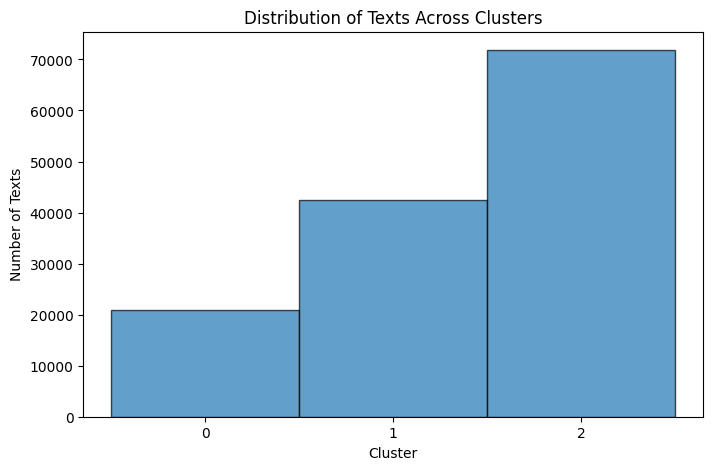

In [55]:
num_clusters = 3

# Plot cluster distribution
plt.figure(figsize=(8, 5))
plt.hist(kmeans_labels, bins=np.arange(num_clusters + 1) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(num_clusters))
plt.xlabel("Cluster")
plt.ylabel("Number of Texts")
plt.title("Distribution of Texts Across Clusters")
plt.show()

The clustering is much better with Word2Vec embeddings.

In [ ]:
if not os.path.exists('./models/kmeans_word2vec_model.joblib'):
    joblib.dump(kmeans_word2vec_model, './models/kmeans_word2vec_model.joblib')

['./models/kmeans_word2vec_model.joblib']

## Truncated SVD

In [ ]:
file = './models/svd_word2vec_model.joblib'
if os.path.exists(file):
    svd_word2vec_model = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    svd_word2vec_model = TruncatedSVD(n_components=2)
    print("Model created! Reducing dimensions...")
    X_reduced = svd_word2vec_model.fit_transform(X_train)

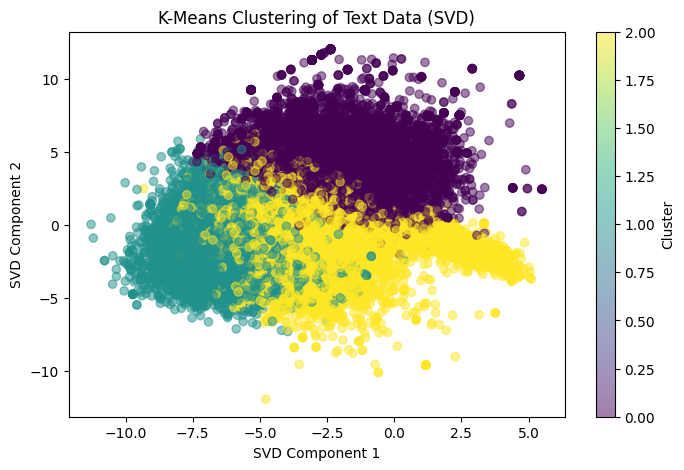

In [58]:
# Scatter plot of clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("K-Means Clustering of Text Data (SVD)")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
if not os.path.exists('./models/svd_word2vec_model.joblib'):
    joblib.dump(X_reduced, './models/svd_word2vec_model.joblib')

['./models/svd_word2vec_model.joblib']